### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 7938</pre>

In [721]:
# student 1: Israel 7938
# student 2: Eran 6215
# student 3: Avihai 2474
# student 4: Almog 8269
# student 5: Liron 5068
# student 6: Matan 9999

## Part 2 - Experiments
You could add as many code cells as needed

In [722]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [723]:
train_set = pd.read_csv('titanic_train.csv')
test_set = pd.read_csv("titanic_test.csv")

In [724]:
train_set.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [725]:
test_set.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [726]:
def showSurvivorsByGenderAndChildren():
    survivors = train_set[train_set['Survived'] == 1]

    #Men
    survived_man = survivors[(survivors['Sex'] == 1) & (survivors['Age'] > 18)]
    survived_man_count = len(survived_man)

    #Women
    survived_women = survivors[(survivors['Sex'] == 0) & (survivors['Age'] > 18)]
    survived_women_count = len(survived_women)

    #Kids
    survived_kids = survivors[survivors['Age'] <= 18]
    survived_kids_count = len(survived_kids)

    survived_count = len(survivors)

    return [survived_man_count, survived_women_count, survived_kids_count, survived_count]

In [727]:
display(train_set.isnull().sum())
print("No missing values in train set")

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

No missing values in train set


## Visualization

In [728]:
# Creating a dataframe for the pie plot using the given parameters
def create_pie_table(population):
    data = {'Category': ['Male', 'Female', 'Kids', 'Total'],
            'Survived': population}

    survivors_df = pd.DataFrame(data)
    survived_count = population[-1]  #get last item

    survivors_df['Percentage'] = survivors_df['Survived'].apply(lambda x: round((x / survived_count) * 100, 1))
    return survivors_df


def show_pie_survived(population_counts):
    labels = ['Male', 'Female', 'Kids']
    colors = ['#E91694', '#94E916', '#1694E9']
    fig, ax = plt.subplots(figsize=(18, 10))
    ax.pie(population_counts, labels=labels, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 20})
    plt.title('Survivors of the Titanic', fontsize=20)
    fig.patch.set_facecolor('white')
    plt.show()

,Category,Survived,Percentage
0,Male,69,24.6
1,Female,156,55.5
2,Kids,56,19.9
3,Total,281,100.0


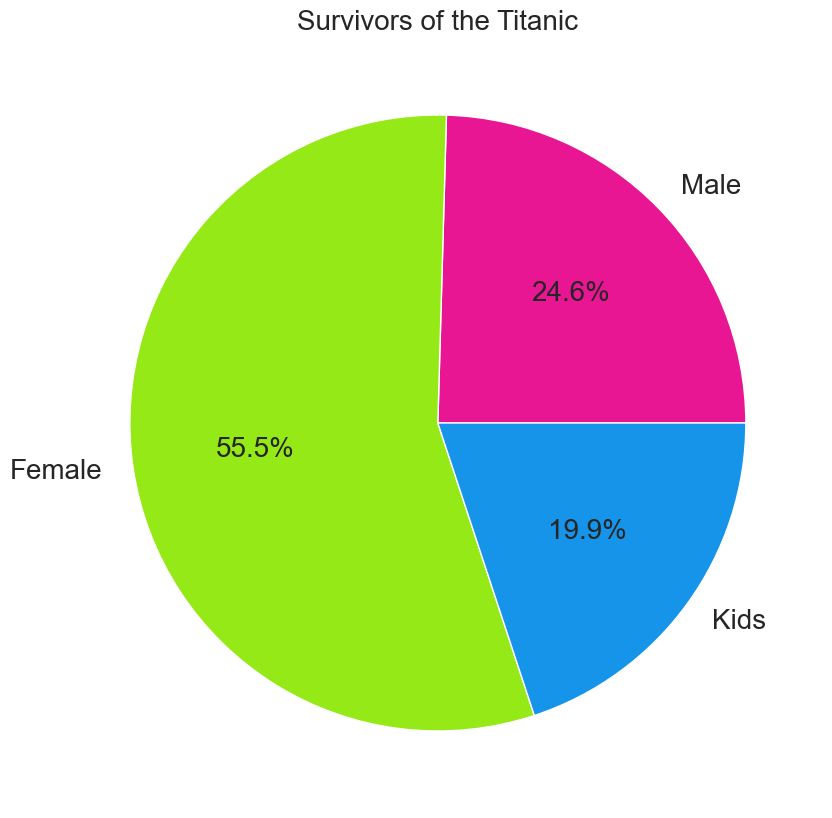

In [729]:
population = showSurvivorsByGenderAndChildren()

# Creating a data table for the pie plot
survived_percentage_df = create_pie_table(population)
display(survived_percentage_df)

population.pop()  #remove last item - total count
show_pie_survived(population)

In [730]:
def plot_hist_gender_survivors():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    
    genders = {'Female': 0, 'Male': 1}
    colors = {'survived': ["#76FF00", "#FF5100"], 'not_survived': ["#8900FF", "#00AEFF"]}
    
    #loop through the combinations of gender and survived status
    for ax, (title, sex) in zip(axes, genders.items()):
        for status, color in colors.items():
            ages = train_set[(train_set['Sex'] == sex) & (train_set['Survived'] == (status == 'survived'))].Age
            sns.histplot(ages, bins=10, label=status, ax=ax, kde=False, color=color[sex])
        
        ax.legend()
        ax.set_title(title)
    
    plt.show()

In [731]:
# Making DataFrame for the histogram above with age group
def createHistTableAG(data_frame):
    age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
    age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

    data_frame = data_frame.copy()
    data_frame['AgeGroup'] = pd.cut(data_frame['Age'], bins=age_bins, labels=age_labels, right=False)

    data = {
        'AgeGroup': age_labels,
        'Survived Women': [],
        'Not Survived Women': [],
        'Survived Men': [],
        'Not Survived Men': []
    }

    for age_group in age_labels:
        survived_women = len(data_frame[(data_frame['AgeGroup'] == age_group) & (data_frame['Sex'] == 0) & (
                data_frame['Survived'] == 1)])
        not_survived_women = len(data_frame[(data_frame['AgeGroup'] == age_group) & (data_frame['Sex'] == 0) & (
                data_frame['Survived'] == 0)])
        survived_men = len(data_frame[(data_frame['AgeGroup'] == age_group) & (data_frame['Sex'] == 1) & (
                data_frame['Survived'] == 1)])
        not_survived_men = len(data_frame[(data_frame['AgeGroup'] == age_group) & (data_frame['Sex'] == 1) & (
                data_frame['Survived'] == 0)])

        data['Survived Women'].append(survived_women)
        data['Not Survived Women'].append(not_survived_women)
        data['Survived Men'].append(survived_men)
        data['Not Survived Men'].append(not_survived_men)

    survivors_by_age = pd.DataFrame(data)

    return survivors_by_age

,AgeGroup,Survived Women,Not Survived Women,Survived Men,Not Survived Men
0,0-10,16,9,15,12
1,11-20,28,8,5,44
2,21-30,75,28,33,180
3,31-40,44,7,19,59
4,41-50,18,9,9,35
5,51-60,9,2,4,23
6,61-70,3,0,2,10
7,71-80,0,0,0,5


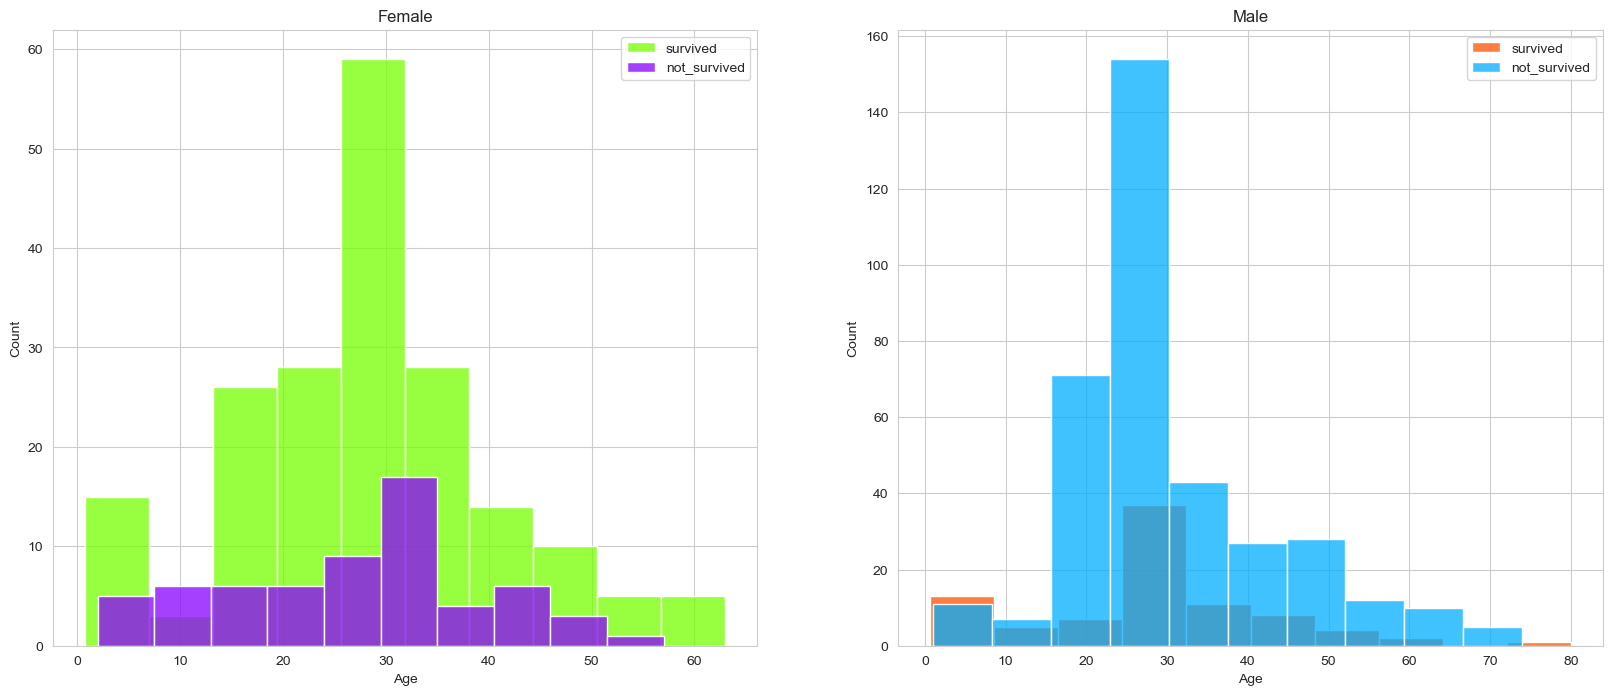

In [732]:
#Creating a data table for the histogram with age group
histTableAges = createHistTableAG(train_set)
display(histTableAges)

plot_hist_gender_survivors()

## Extract x_train/test and y_train/test

In [733]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
label = 'Survived'
x_train = train_set[features]
y_train = train_set[label]

x_test = test_set[features]
y_test = test_set[label]

# Feature engineering

### Find Outliers

#### let's check for Age outliers (using boxplot)

<Axes: ylabel='Fare'>

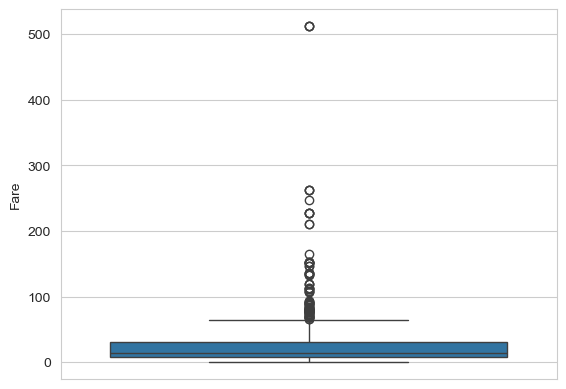

In [734]:
# Fare outliers
sns.boxplot(train_set.Fare)

In [735]:
train_set["Fare"].median()

14.5

In [736]:
train_set["Fare"].describe()

count    712.000000
mean      32.379429
std       49.836074
min        0.000000
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [737]:
# Find Fare outliers:

# "minimum" = Q1 - 1.5 * IQR
# "maximum" = Q3 + 1.5 * IQR
def outliersByIQR(col_name):
    Q1 = np.percentile(train_set[col_name], 25)
    Q3 = np.percentile(train_set[col_name], 75)
    IQR = Q3 - Q1

    Fare_Outliers = train_set[(train_set[col_name] < Q1 - 1.5 * IQR) | (train_set[col_name] > Q3 + 1.5 * IQR)].index
    print(f'Sum of Age_outliers: {len(Fare_Outliers)}')
    
# remove outliers by column name
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

<Axes: ylabel='Age'>

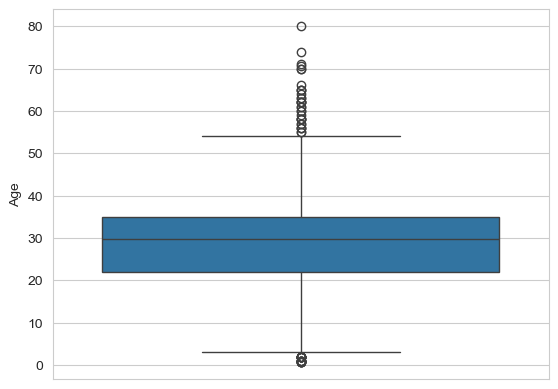

In [738]:
# check outliers for Age
sns.boxplot(train_set.Age)

In [739]:
train_set["Age"].median()
train_set["Age"].describe()

count    712.000000
mean      29.531213
std       13.188028
min        0.670000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [740]:
train_set["Fare"].median()
train_set["Fare"].describe()

count    712.000000
mean      32.379429
std       49.836074
min        0.000000
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [741]:
# Find Age outliers:
outliersByIQR("Age")
outliersByIQR("Fare")

Sum of Age_outliers: 54
Sum of Age_outliers: 93


In [742]:
#save the dataframe with the removed data
updated_df = remove_outlier(train_set, "Age")
print(updated_df.count())

Pclass      658
Sex         658
Age         658
SibSp       658
Parch       658
Fare        658
Embarked    658
Survived    658
dtype: int64


In [743]:
#save the dataframe with the removed data
train_set = remove_outlier(train_set, "Fare")
print(train_set.count())

Pclass      619
Sex         619
Age         619
SibSp       619
Parch       619
Fare        619
Embarked    619
Survived    619
dtype: int64


#### For Numeric values:
#### Descriptive statistics: min, max, percentile, mean, std etc for numeric values:

### Check for missing Data - and fill when needed

In [744]:
# Let's start by finding the missing values
def check_missing_data(df):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0]  # Only show columns with missing data
    return missing_data

def fix_missing_values(data_frame):
    fill_strategies = {
        'Pclass': data_frame['Pclass'].mode()[0],
        'Sex': data_frame['Sex'].mode()[0],
        'Age': data_frame['Age'].mean(),
        'SibSp': data_frame['SibSp'].mode()[0],
        'Parch': data_frame['Parch'].mode()[0],
        'Fare': data_frame['Fare'].median(),
        'Embarked': data_frame['Embarked'].mode()[0],
        'Survived': data_frame['Survived'].mode()[0]
    }
    
    for column, fill_value in fill_strategies.items():
        if column in data_frame.columns:
            data_frame[column].fillna(fill_value, inplace=True)
    
    return data_frame

In [745]:
missing_data = check_missing_data(train_set)
# print("Missing data",missing_data)

if len(missing_data) > 0:
    fix_missing_values(train_set)
    # check_missing_data(train_set)
    print(f"Filled missing data ({missing_data})")
else:
    print("No missing data")

No missing data


In [746]:
# Use the NumPy percentile() method to find the percentiles
def agePercentile(dataFrame):
    x_age = np.percentile(dataFrame["Age"], 75)
    y_age = np.percentile(dataFrame["Age"], 90)

    print(f'x_age meaning that 75% of the people on the Titanic are {x_age} years old')
    print(f'y_age meaning that 90% of the people on the Titanic are {y_age} years old')

In [747]:
agePercentile(train_set)

x_age meaning that 75% of the people on the Titanic are 34.0 years old
y_age meaning that 90% of the people on the Titanic are 46.200000000000045 years old


#### Feature engineering for Naive Bayes:

##### Basic train ,test function for naive bayes

In [748]:
def train_naive_bayes(x_train, y_train):
    # Initialize the Gaussian Naive Bayes model
    model = GaussianNB()
    
    # Fit the model to the training data
    model.fit(x_train, y_train)
    
    return model

def test_naive_bayes(model, X_test, y_test):
    # Predict the target values for the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    
    accuracy = accuracy_score(y_test, y_pred)
     # Generate a classification report
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

##### Feature engineering checks

In [749]:
def get_best_feature_engineering_techniques(X_train, X_test, y_train, y_test, max_pca_dim=5):
    techniques = []
    best_accuracy = 0
    best_technique = ''
    best_X_train = X_train
    best_X_test = X_test

    # No scaling or PCA (baseline)
    techniques.append(('No Feature Engineering', X_train, X_test))

    # Scaling only
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    techniques.append(('Scaling Only', X_train_scaled, X_test_scaled))

    # Scaling with PCA
    for dim in range(1, max_pca_dim + 1):
        pca = PCA(n_components=dim)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)
        techniques.append((f'Scaling + PCA with {dim} dimensions', X_train_pca, X_test_pca))

    for name, X_train_transformed, X_test_transformed in techniques:
        model = train_naive_bayes(X_train_transformed, y_train)
        accuracy,_ = test_naive_bayes(model, X_test_transformed, y_test)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_technique = name
            best_X_train = X_train_transformed
            best_X_test = X_test_transformed

    return best_accuracy, best_technique, best_X_train, best_X_test

In [750]:
max_accuracy, best_technique, best_X_train, best_X_test = get_best_feature_engineering_techniques(x_train, x_test, y_train, y_test, max_pca_dim=5)
print(f'Max Accuracy: {max_accuracy}')
print(f'Best Feature Engineering Technique: {best_technique}')

Max Accuracy: 0.8156424581005587
Best Feature Engineering Technique: Scaling + PCA with 3 dimensions


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

## KNN training:

In [751]:
def train_KNN(x_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=11)
    knn.fit(x_train, y_train)
    return knn

knn_trained = train_KNN(x_train,y_train)

# Naive Bayes training:

In [752]:
def train_best_model():
    max_accuracy, best_technique, best_X_train, best_X_test = get_best_feature_engineering_techniques(x_train, x_test, y_train, y_test)
    
    # Train final model with the best feature engineering technique
    final_model = train_naive_bayes(best_X_train, y_train)
    final_accuracy,_ = test_naive_bayes(final_model, best_X_test, y_test)

    return final_model, max_accuracy, best_technique, final_accuracy

In [753]:
final_model, max_accuracy, best_technique, final_accuracy = train_best_model()
print(f'Max Accuracy: {max_accuracy}')
print(f'Best Feature Engineering Technique: {best_technique}')
print(f'Final Model Accuracy: {final_accuracy}')

Max Accuracy: 0.8156424581005587
Best Feature Engineering Technique: Scaling + PCA with 3 dimensions
Final Model Accuracy: 0.8156424581005587


## Part 4 - Apply on test and show model performance estimation

## KNN algorithm testing:

In [754]:
test_set = pd.read_csv("titanic_test.csv")

In [755]:
y_predict_knn = knn_trained.predict(x_test)
accuracy = accuracy_score(y_test, y_predict_knn)
print("accuracy: ", accuracy)

accuracy:  0.7374301675977654


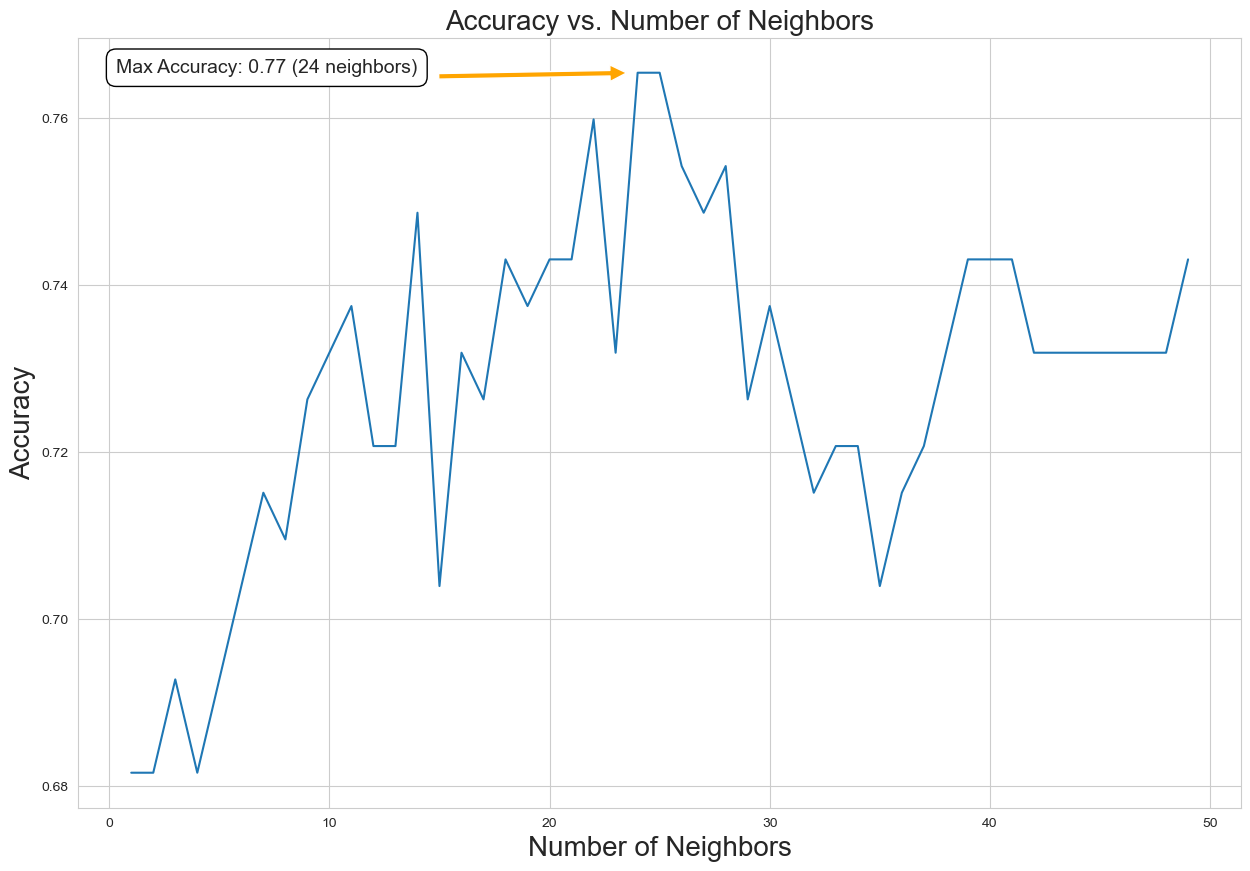

In [756]:
def knn_test(x_train, y_train,x_test, y_test):
    neighbors = np.arange(1, 50)
    accuracy_scores = []
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
    
    return neighbors, accuracy_scores

def plot_knn_test(neighbors, accuracy_scores):
    plt.figure(figsize=(15, 10))
    plt.plot(neighbors, accuracy_scores)
    plt.xlabel('Number of Neighbors', fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    plt.title('Accuracy vs. Number of Neighbors', fontsize=20)
    
    # Finding the maximum accuracy and its corresponding neighbor
    max_index = np.argmax(accuracy_scores)
    max_neighbor = neighbors[max_index]
    max_accuracy = accuracy_scores[max_index]
    
    # Adding annotation
    plt.annotate(f'Max Accuracy: {max_accuracy:.2f} ({max_neighbor} neighbors)',
                 xy=(max_neighbor, max_accuracy),  # Arrowhead position
                 xytext=(max_neighbor - 10, max_accuracy),  # Text position above the point
                 arrowprops=dict(facecolor='orange', shrink=0.05),
                 ha='right', fontsize=14, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    plt.show()

# Run the knn_test function and plot results
neighbors, accuracy_scores = knn_test(x_train, y_train,x_test, y_test)
plot_knn_test(neighbors, accuracy_scores)

## Naive Bayes algorithm testing:

In [757]:
def train_best_model():
    max_accuracy, best_technique, best_X_train, best_X_test = get_best_feature_engineering_techniques(x_train, x_test, y_train, y_test)
    
    # Train final model with the best feature engineering technique
    final_model = train_naive_bayes(best_X_train, y_train)
    final_accuracy, final_report = test_naive_bayes(final_model, best_X_test, y_test)

    return final_model, max_accuracy, best_technique, final_accuracy, final_report

def evaluate_model(model, X_test, y_test):
    accuracy, report = test_naive_bayes(model, X_test, y_test)
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    return accuracy, report

In [758]:
final_model, max_accuracy, best_technique, final_accuracy, final_report = train_best_model()
print(f'Max Accuracy: {max_accuracy}')
print(f'Best Feature Engineering Technique: {best_technique}')
print(f'Final Model Accuracy: {final_accuracy}')
print("Final Model Classification Report:")
print(final_report)

Max Accuracy: 0.8156424581005587
Best Feature Engineering Technique: Scaling + PCA with 3 dimensions
Final Model Accuracy: 0.8156424581005587
Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       118
           1       0.75      0.69      0.72        61

    accuracy                           0.82       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.81      0.82      0.81       179

